# Hackathon - Mentor version

Hey everyone, thanks for taking a look! 

Here I'm going to explain the hackathon from the mentor's perspective and do some of the groundwork.

## Dataset
The dataset is a pre-processed sample of the Ames housing dataset:
- I have provided the full dataset description, although it's important to note that the dataset we will use has been __pre-processed__ to select certain features and apply transformations such as one-hot encoding and scaling.

## Competition
In case you are unfamiliar with the way Kaggle competitions work, here is a brief overview of how we can run it:

__Phase 1 (3 hours):__
- Fellows will be provided the Training dataset to use for training and evaluating their model until they are satisfied, or time runs out.

__Phase 2 (1 hour):__
- Mentors will provide them the Competition dataset to evaluate their model for the competition
- This is __unseen__ data from the model's, and will be used to judge the competition.
- The team with the highest score (lowest RMSE) on the competiton dataset will be declared the winner.

__Phase 3 (1 hour):__
- Each team will walk through their notebook and share their experience with the other teams.

## Preparation
We need to create a Training set and Competition set to use for the contest. 

I'll show you how I did it, and then write each dataset out to separate files to provide to the fellows at each stage of the competition.

### Splitting the dataset into Training and Competition sets
- I did this very crudely, just taking the first 1k records as Training and the remaining ~500 records as Competition.
- I checked out the distribution of the full set, the Training set and the Competition set afterwards and they looked pretty similar.
- I then wrote each dataset to a separate file called 'Training' and 'Competition'

#### Import full dataset

In [1]:
import pandas as pd

df = pd.read_csv('CleanFileWithScore.csv')

df.shape                

(8708, 51)

In [2]:
df = df.drop('ZipScore', 1)
df = df.drop('Unnamed: 0', 1)

#### Check out distribution of full dataset

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bedrooms,8708.0,1.662265,0.786772,0.000000,1.000000,1.000000,2.000000,6.000000
Baths,8708.0,1.429720,0.763643,1.000000,1.000000,1.000000,2.000000,9.000000
Latitude,8708.0,14.577654,0.720981,1.000000,14.551712,14.570650,14.596275,76.000000
Longitude,8708.0,121.029460,1.445137,1.000000,121.025001,121.047619,121.059898,122.266475
24-hour security,8708.0,0.855535,0.351581,0.000000,1.000000,1.000000,1.000000,1.000000
Alarm System,8708.0,0.715204,0.451343,0.000000,0.000000,1.000000,1.000000,1.000000
Badminton court,8708.0,0.111621,0.314918,0.000000,0.000000,0.000000,0.000000,1.000000
Bar,8708.0,0.103583,0.304736,0.000000,0.000000,0.000000,0.000000,1.000000
Basketball court,8708.0,0.233463,0.423059,0.000000,0.000000,0.000000,0.000000,1.000000
Billiards table,8708.0,0.107258,0.309458,0.000000,0.000000,0.000000,0.000000,1.000000


#### Splitting into Training and Competition sets and check out distribution

In [4]:
df_train = df[0:1000]
df_train.shape

(1000, 49)

In [5]:
df_train.describe()

,Bedrooms,Baths,Latitude,Longitude,24-hour security,Alarm System,Badminton court,Bar,Basketball court,Billiards table,...,Fitness_Sports Center,Multi-Purpose Area,Parking Area,Entertainment_Game Room,Study Area_Library,Business Center_Shops,Open Space_Parks_Garden_Jogging Path,Reception_Lobby_Lounge,Cities_Num,PricePerSQM
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000
mean,1.63800,1.600500,14.560410,121.025905,0.840000,0.705000,0.105000,0.137000,0.126000,0.080000,...,0.686000,0.539000,0.571000,0.297000,0.212000,0.368000,0.419000,0.712000,0.0,239677.310054
std,0.79724,0.904969,0.006451,0.009348,0.366789,0.456271,0.306707,0.344019,0.332015,0.271429,...,0.464349,0.498726,0.495181,0.457165,0.408929,0.482503,0.493642,0.453058,0.0,67611.614995
min,1.00000,1.000000,14.536916,120.982882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,77142.857143
25%,1.00000,1.000000,14.553420,121.018540,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,185507.433187
50%,1.00000,1.000000,14.562949,121.027400,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,233687.943262
75%,2.00000,2.000000,14.565192,121.033470,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.0,290632.505561
max,5.00000,5.000000,14.634290,121.084980,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,390235.294118


In [6]:
df_comp = df[1000:]

In [7]:
df_comp.shape
df_comp.describe()

,Bedrooms,Baths,Latitude,Longitude,24-hour security,Alarm System,Badminton court,Bar,Basketball court,Billiards table,...,Fitness_Sports Center,Multi-Purpose Area,Parking Area,Entertainment_Game Room,Study Area_Library,Business Center_Shops,Open Space_Parks_Garden_Jogging Path,Reception_Lobby_Lounge,Cities_Num,PricePerSQM
count,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,...,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000,7708.000000
mean,1.665413,1.407564,14.579892,121.029921,0.857551,0.716528,0.112481,0.099248,0.247405,0.110794,...,0.655423,0.609626,0.583031,0.328360,0.198884,0.319149,0.553321,0.731967,4.654126,157292.533350
std,0.785401,0.740529,0.766297,1.536029,0.349533,0.450713,0.315977,0.299013,0.431532,0.313897,...,0.475261,0.487866,0.493090,0.469647,0.399187,0.466177,0.497181,0.442964,3.076337,71069.485766
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26356.589147
25%,1.000000,1.000000,14.551250,121.030600,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,103123.748989
50%,1.000000,1.000000,14.575299,121.050200,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,142857.142857
75%,2.000000,2.000000,14.601280,121.063600,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,7.000000,201611.905052
max,6.000000,9.000000,76.000000,122.266475,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,397640.350877


#### Write out to separate files

In [8]:
df_train.to_csv("Train.csv")

In [9]:
df_comp.to_csv("Comp.csv")

## Phase 1: Training and evaluation the model on the Train data

In [10]:
import pandas as pd
import numpy as np
df_train = pd.read_csv('Train.csv')

In [11]:
X, y = df_train.iloc[:,:-1],df_train.iloc[:,-1]
# y,X = df_train.iloc[:,-1],df_train.drop(['Unnamed: 0','SalePrice'],axis =1)

In [12]:
from sklearn.model_selection import train_test_split

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Baseline Model

In [13]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Fit the regressor to the training set
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 47894.610080


In [14]:
# xg_reg.get_booster().get_score(importance_type = 'weight')

## Tuned Model - Grid Search

In [16]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
#from sklearn import preprocessing
#from sklearn.feature_selection import RFE
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.1],
    'n_estimators': [100,125,150,200, 225, 250],
    'max_depth': [5, 6, 7],
    'eta': [0.1]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(objective='reg:squarederror')

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,cv=4,scoring='neg_mean_squared_error',verbose=1)


# Fit grid_mse to the data
grid_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest R2 found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters found:  {'colsample_bytree': 0.1, 'eta': 0.1, 'max_depth': 6, 'n_estimators': 125}
Lowest R2 found:  53054.28710598918


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    3.7s finished


In [ ]:
#conda update scikit-learn

In [46]:
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE, SelectFromModel
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
# Defining our estimator, the algorithm to optimize
#lasso = make_pipeline(RobustScaler(), SelectFromModel(XGBRegressor(n_estimators=200, max_depth=4, colsample_bytree=0.3, eta=0.001)),Lasso(alpha = 0.01))
#ridge = make_pipeline(RobustScaler(),SelectFromModel(XGBRegressor(n_estimators=200, max_depth=4, colsample_bytree=0.3, eta=0.001)),Ridge())
#enet = make_pipeline(RobustScaler(),SelectFromModel(XGBRegressor(n_estimators=200, max_depth=4, colsample_bytree=0.3, eta=0.001)),ElasticNet())
#rfreg = make_pipeline(RobustScaler(),SelectFromModel(XGBRegressor(n_estimators=200, max_depth=4, colsample_bytree=0.3, eta=0.001)),RandomForestRegressor())
#gbreg = make_pipeline(RobustScaler(),SelectFromModel(XGBRegressor(n_estimators=200, max_depth=4, colsample_bytree=0.3, eta=0.001)),GradientBoostingRegressor())
#lsvr = make_pipeline(RobustScaler(),SelectFromModel(XGBRegressor(n_estimators=200, max_depth=4, colsample_bytree=0.3, eta=0.001)),LinearSVR())
#xgbreg = make_pipeline(RobustScaler(),SelectFromModel(XGBRegressor(n_estimators=200, max_depth=4, colsample_bytree=0.3, eta=0.001)),XGBRegressor())
#lgbreg = make_pipeline(RobustScaler(),SelectFromModel(XGBRegressor(n_estimators=200, max_depth=4, colsample_bytree=0.3, eta=0.001)),LGBMRegressor())
classifiers = {
    "linreg": LinearRegression(),
    "rfreg":RandomForestRegressor(),
    "lgbreg":LGBMRegressor(),
    "xgbreg":XGBRegressor(objective ='reg:squarederror'),
    "adbreg":AdaBoostRegressor(base_estimator = XGBRegressor(objective = 'reg:squarederror')),
    "breg":BaggingRegressor(base_estimator = XGBRegressor(objective = 'reg:squarederror'))
}
no_classifiers = len(classifiers.keys())
#models_to_train = [lasso,ridge,enet,rfreg,lsvr,gbreg,xgbreg]

In [47]:
# Defining the hyperparameters to optimize
grids = dict(lingrid = { # Lasso
        'fit_intercept':[True, False],
        'normalize':[True,False]},
    rfgrid = { #Random Forest
        'clf__max_depth':[9, 11, 13, 15], 
        'clf__n_estimators':[250,300,350,400],
        'clf__max_features':[8,10,12,14,16]},
    lgbgrid = { #Light Gradient Boosting
        'clf__learning_rate':[0.1,0.01,0.002,0.001],
        'clf__n_estimators':[500,600,700,800],
        'clf__max_depth':[3,5,6,7]},
    xgbgrid = { #XGBoost
        'clf__colsample_bytree': [0.3, 0.2, 0.1],
        'clf__n_estimators': [100,125,150,200],
        'clf__max_depth': [4, 5,6 ,7 ],
        'clf__eta': [0.001,0.01,0.1]},
    adbgrid ={ #Adaboost
        'clf__n_estimators':[50,100,150],
        'clf__learning_rate':[0.1,0.01,0.02,0.011],
        'clf__loss':['linear','square']},
    bgrid = { #Bagging
        'clf__n_estimators':[12,24,48,50],
        'clf__max_features':[20,25,30,35],
        'clf__bootstrap_features':[True,False]},
) 
#LGBMRegressor()

In [56]:
from sklearn.metrics import r2_score

def batch_regress(X_train, y_train, X_test, Y_test, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier','RMSE','R2'])
    count = 0
    #count2 = 0
    for key, classifier in classifiers.items():
        for key2, grid in grids.items():
            scaler = StandardScaler()
            #selector = feature_selection.RFE(classifier)#implement rfe for each classifier
            pipe = Pipeline([('scale',scaler),('clf',classifier)])#scale and apply the classifier
                
            if key is 'rfreg' and key2 is 'rfgrid':
                print(key,key2)
                rand_search = GridSearchCV(pipe, param_grid=grid, scoring='r2',cv=5, verbose=1, n_jobs=-1)
                rand_search.fit(X_train, y_train)
                R2 = rand_search.best_score_
                #df_results.loc[count,'classifier'] = key
                #df_results.loc[count,'R2'] = R2
                count +=1
                print("Best parameters found: ", rand_search.best_params_)
                print("Lowest R2 found: ", rand_search.best_score_)
                preds = rand_search.best_estimator_.predict(X_test)
                test_rmse = np.sqrt(mean_squared_error(y_test, preds))
                test_R2 = r2_score(y_test, preds)
                df_results.loc[count,'classifier'] = key
                df_results.loc[count,'RMSE'] = test_rmse
                df_results.loc[count,'R2'] = R2
                print("Test RMSE found: ", test_rmse)
                print("Test R2 found: ", test_R2, "\n\n")
            
            elif key is 'lgbreg' and key2 is 'lgbgrid':
                print(key,key2)
                rand_search = GridSearchCV(pipe, param_grid=grid, scoring='r2',cv=5, verbose=1, n_jobs=-1)
                rand_search.fit(X_train, y_train)
                R2 = rand_search.best_score_
                #df_results.loc[count,'classifier'] = key
                #df_results.loc[count,'R2'] = R2
                count +=1
                print("Best parameters found: ", rand_search.best_params_)
                print("Lowest R2 found: ", rand_search.best_score_)
                preds = rand_search.best_estimator_.predict(X_test)
                test_rmse = np.sqrt(mean_squared_error(y_test, preds))
                test_R2 = r2_score(y_test, preds)
                df_results.loc[count,'classifier'] = key
                df_results.loc[count,'RMSE'] = test_rmse
                df_results.loc[count,'R2'] = R2
                print("Test RMSE found: ", test_rmse)
                print("Test R2 found: ", test_R2, "\n\n")
            
            elif key is 'xgbreg' and key2 is 'xgbgrid':
                print(key,key2)           
                rand_search = GridSearchCV(pipe, param_grid=grid, scoring='r2',cv=5, verbose=1, n_jobs=-1)
                rand_search.fit(X_train, y_train)
                R2 = rand_search.best_score_
                #df_results.loc[count,'classifier'] = key
                #df_results.loc[count,'R2'] = R2
                count +=1
                print("Best parameters found: ", rand_search.best_params_)
                print("Lowest R2 found: ", rand_search.best_score_)
                preds = rand_search.best_estimator_.predict(X_test)
                test_rmse = np.sqrt(mean_squared_error(y_test, preds))
                test_R2 = r2_score(y_test, preds)
                df_results.loc[count,'classifier'] = key
                df_results.loc[count,'RMSE'] = test_rmse
                df_results.loc[count,'R2'] = R2
                print("Test RMSE found: ", test_rmse)
                print("Test R2 found: ", test_R2, "\n\n")
            
            elif key is 'adbreg' and key2 is 'adbgrid':
                print(key,key2)
                rand_search = GridSearchCV(pipe, param_grid=grid, scoring='r2',cv=5, verbose=1, n_jobs=-1)
                rand_search.fit(X_train, y_train)
                R2 = rand_search.best_score_
                #df_results.loc[count,'classifier'] = key
                #df_results.loc[count,'R2'] = R2
                count +=1
                print("Best parameters found: ", rand_search.best_params_)
                print("Lowest R2 found: ", rand_search.best_score_)
                preds = rand_search.best_estimator_.predict(X_test)
                test_rmse = np.sqrt(mean_squared_error(y_test, preds))
                test_R2 = r2_score(y_test, preds)
                df_results.loc[count,'classifier'] = key
                df_results.loc[count,'RMSE'] = test_rmse
                df_results.loc[count,'R2'] = R2
                print("Test RMSE found: ", test_rmse)
                print("Test R2 found: ", test_R2, "\n\n")
                
            
            elif key is 'breg' and key2 is 'bgrid':
                print(key,key2)           
                rand_search = GridSearchCV(pipe, param_grid=grid, scoring='r2',cv=5, verbose=1, n_jobs=-1)
                rand_search.fit(X_train, y_train)
                R2 = rand_search.best_score_
                #df_results.loc[count,'classifier'] = key
                #df_results.loc[count,'R2'] = R2
                count +=1
                print("Best parameters found: ", rand_search.best_params_)
                print("Lowest R2 found: ", rand_search.best_score_)
                preds = rand_search.best_estimator_.predict(X_test)
                test_rmse = np.sqrt(mean_squared_error(y_test, preds))
                test_R2 = r2_score(y_test, preds)
                df_results.loc[count,'classifier'] = key
                df_results.loc[count,'RMSE'] = test_rmse
                df_results.loc[count,'R2'] = R2
                print("Test RMSE found: ", test_rmse)
                print("Test R2 found: ", test_R2, "\n\n")
            else:
                pass
    return df_results

In [57]:
df_results = batch_regress(X_train,y_train,X_test, y_test)
df_results.to_csv("PriceReport.csv")
df_results

rfreg rfgrid
Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   19.7s finished


Best parameters found:  {'clf__max_depth': 9, 'clf__max_features': 16, 'clf__n_estimators': 250}
Lowest R2 found:  0.5326343114783081
Test R2 found:  0.6223406981711612 


lgbreg lgbgrid
Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    7.9s finished


Best parameters found:  {'clf__learning_rate': 0.01, 'clf__max_depth': 7, 'clf__n_estimators': 500}
Lowest R2 found:  0.516921867457828
Test R2 found:  0.5969826073135556 


xgbreg xgbgrid
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 532 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters found:  {'clf__colsample_bytree': 0.1, 'clf__eta': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 150}
Lowest R2 found:  0.5274791290544927
Test R2 found:  0.629063362294207 


adbreg adbgrid
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.4min finished


Best parameters found:  {'clf__learning_rate': 0.011, 'clf__loss': 'linear', 'clf__n_estimators': 100}
Lowest R2 found:  0.5204779695288395
Test R2 found:  0.6286060710083765 


breg bgrid
Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   56.8s finished


Best parameters found:  {'clf__bootstrap_features': True, 'clf__max_features': 30, 'clf__n_estimators': 24}
Lowest R2 found:  0.5382739290214102
Test R2 found:  0.6404785097318988


,classifier,R2
0,rfreg,0.532634
1,lgbreg,0.516922
2,xgbreg,0.527479
3,adbreg,0.520478
4,breg,0.538274
5,0,0.000000


In [60]:
def batch_regress22(X_train, y_train, X_test, Y_test, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,2)), columns = ['classifier','R2'])
    count = 0
    #count2 = 0
    for key, classifier in classifiers.items():
        for key2, grid in grids.items():
            scaler = StandardScaler()
            #selector = feature_selection.RFE(classifier)#implement rfe for each classifier
            pipe = Pipeline([('scale',scaler),('clf',classifier)])#scale and apply the classifier
            if key is 'breg' and key2 is 'bgrid':
                print(key,key2)           
                rand_search = GridSearchCV(pipe, param_grid=grid, scoring='r2',cv=5, verbose=1)
                rand_search.fit(X_train, y_train)
                R2 = rand_search.best_score_
                df_results.loc[count,'classifier'] = key
                df_results.loc[count,'R2'] = R2
                count +=1
                print("Best parameters found: ", rand_search.best_params_)
                print("Lowest R2 found: ", rand_search.best_score_)
                preds = rand_search.best_estimator_.predict(X_test)
#                 ft_importance = rand_search.best_estimator_.feature_importances_
                test_R2 = r2_score(y_test, preds)
                print("Test R2 found: ", test_R2)
#                 print(ft_importance, "\n\n")
            else:
                pass
    return rand_search

In [61]:
gsearch = batch_regress22(X_train, y_train, X_test, y_test)

breg bgrid
Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  4.1min finished


Best parameters found:  {'clf__bootstrap_features': True, 'clf__max_features': 20, 'clf__n_estimators': 24}
Lowest R2 found:  0.5419431555035006
Test R2 found:  0.622392715753625


In [62]:
feature_cols = df.columns[:-1]
df_features_imp = pd.DataFrame({'feature':df[df.columns].columns, 'importance':gsearch.best_estimator_.named_steps["clf"].feature_importances_}).sort_values(by="importance", ascending=False)
df_features_imp.to_csv("feature_imp.csv")
df_features_imp

AttributeError: 'BaggingRegressor' object has no attribute 'feature_importances_'

In [40]:
df.head()

,Bedrooms,Baths,Latitude,Longitude,24-hour security,Alarm System,Badminton court,Bar,Basketball court,Billiards table,...,Fitness_Sports Center,Multi-Purpose Area,Parking Area,Entertainment_Game Room,Study Area_Library,Business Center_Shops,Open Space_Parks_Garden_Jogging Path,Reception_Lobby_Lounge,Cities_Num,PricePerSQM
0,3.0,4.0,14.562949,121.036339,1,1,1,0,1,1,...,1,1,1,0,0,1,1,1,0,360000.000000
1,3.0,4.0,14.562949,121.036339,1,1,1,0,1,1,...,1,1,1,0,0,1,1,1,0,365000.000000
2,1.0,1.0,14.566278,121.037021,1,0,0,0,0,0,...,1,1,1,0,0,1,1,1,0,296875.000000
3,3.0,4.0,14.566278,121.037021,1,1,0,0,0,0,...,1,1,1,0,0,1,1,1,0,336322.869955
4,3.0,3.0,14.566646,121.039043,1,1,0,0,0,0,...,1,1,1,0,0,1,1,1,0,333333.333333


In [ ]:
model = AdaBoostRegressor(base_estimator = XGBRegressor(objective = 'reg:squarederror'))
feature = df.columns[1:]

print()


pd.DataFrame({'feature':feature_df[feature_cols].columns, 'importance':model.feature_importances_}).sort_values(by="importance", ascending=False)

In [22]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       scoring_test=mean_squared_error, do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    best_model = fitted_model.best_estimator_
    best_params = gs.best_params_
    
    if do_probabilities:
        preds = fitted_model.predict_proba(X_test_data)
    else:
        preds = fitted_model.predict(X_test_data)
    
    score = np.sqrt(scoring_test(y_test_data, pred))
    
    return [best_model, preds, score, best_params]

In [ ]:
#models_preds_scores = []

#for i, model in enumerate(models_to_train):
#    params = grid_parameters[i]
    
#    result = algorithm_pipeline(X_train, X_test, y_train, y_test, 
#                                 model, params, cv=5)
#    models_preds_scores.append(result)
#for result in models_preds_scores:
#    print('Model: {0}, RMSE Score: {1}, Params:{2}'.format(type(result[0]).__name__, result[2], result[3]))

In [28]:
# define cross validation strategy
from sklearn.linear_model import LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor
scaler = StandardScaler()
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),
          ExtraTreesRegressor(),XGBRegressor()]
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "LinSVR", "Ela","SGD","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X, y)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 65257.870093, 4801.0555
Ridge: 74398.246341, 13973.0862
Lasso: 65259.675699, 4802.7312
RF: 60544.116819, 12664.8855
GBR: 58278.150161, 9814.9449
LinSVR: 89730.114980, 28586.4659
Ela: 73909.448268, 13573.5762
SGD: 171546159193722.593750, 101512253142873.2656
Extra: 53944.265187, 5652.8934
Xgb: 63986.354513, 11133.2130


In [41]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats


 mu = 0.33 and sigma = 0.00



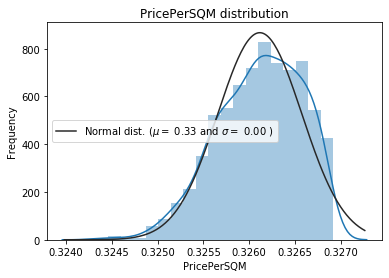

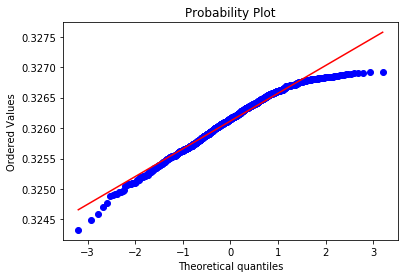

In [43]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["PricePerSQM"] = np.log1p(df_train["PricePerSQM"])

#Check the new distribution 
sns.distplot(df_train['PricePerSQM'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['PricePerSQM'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('PricePerSQM distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['PricePerSQM'], plot=plt)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5CDDCA708>,
      dtype=object)

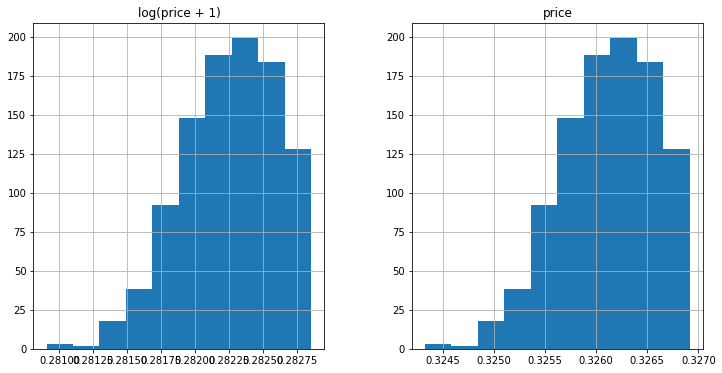

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":df_train["PricePerSQM"], "log(price + 1)":np.log1p(df_train["PricePerSQM"])})
prices.hist()

## Tuned Model - Training

In [ ]:
RFE()

In [20]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from lightgbm import LGBMRegressor
from sklearn.feature_selection import RFE, SelectFromModel
import warnings

In [46]:
warnings.filterwarnings('ignore')
# Instantiate the XGBRegressor: xg_reg
#xg_reg = LGBMRegressor(boosting_type = 'gbdt',learning_rate = 0.01,n_estimators=800, max_depth=4)
#xg_reg = make_pipeline(RobustScaler(),LGBMRegressor(objective = 'regression',colsample_bytree = 0.4, eta = 0.0001, max_depth = 7,max_features = 10,n_estimators = 100,random_state = 17))
#xg_reg = GradientBoostingRegressor(n_estimators = 400, learning_rate = 0.3,max_depth = 1, random_state = 10)
xg_reg = RandomForestRegressor(max_depth= 15, max_features = 30, min_samples_leaf = 2, n_estimators = 250)
#xg_reg = make_pipeline(StandardScaler(),RFE(xgb.XGBRegressor(objective = 'reg:squarederror'),n_features_to_select = 20, step = 2), xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.7, eta = 0.001, max_depth = 3, max_features = 2, n_estimators = 2100))
#xg_reg = ElasticNet(alpha = 0.001,normalize = False, selection = 'random',tol = 1e-06)
#xg_reg = BaggingRegressor(base_estimator = XGBRegressor(objective = 'reg:squarederror'),bootstrap_features = False, max_features = 35,n_estimators = 12)
#Best parameters found:  {'clf__bootstrap_features': False, 'clf__max_features': 35, 'clf__n_estimators': 12}
#Best parameters found:  {'clf__alpha': 0.001, 'clf__normalize': False, 'clf__selection': 'random', 'clf__tol': 1e-06}
#Best parameters found:  {'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 800}
# Fit the regressor to the training set
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 42423.563731


## Phase 2: Using trained model on the competition set

In [47]:
df_comp = pd.read_csv('Comp.csv')
df_comp.head()

,Unnamed: 0,Bedrooms,Baths,Latitude,Longitude,24-hour security,Alarm System,Badminton court,Bar,Basketball court,...,Fitness_Sports Center,Multi-Purpose Area,Parking Area,Entertainment_Game Room,Study Area_Library,Business Center_Shops,Open Space_Parks_Garden_Jogging Path,Reception_Lobby_Lounge,Cities_Num,PricePerSQM
0,1000,1.0,1.0,14.562543,121.015199,1,0,0,0,0,...,1,0,1,1,0,0,0,1,0,222222.222222
1,1001,1.0,1.0,14.563546,121.022074,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,191304.347826
2,1002,1.0,1.0,14.563546,121.022074,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,205147.333085
3,1003,2.0,2.0,14.562744,121.016137,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,306420.622222
4,1004,1.0,1.0,14.559236,121.016957,1,1,0,1,0,...,1,1,1,1,1,1,1,1,0,169850.142602


In [51]:
y_comp, X_comp = df_comp.iloc[:,-1], df_comp.drop(['Unnamed: 0'], axis = 1)

In [52]:
preds_comp = xg_reg.predict(X_comp)

In [53]:
# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_comp, preds_comp))
print("RMSE: %f" % (rmse))

RMSE: 124461.629241


In [54]:
#33783.682
#34271
#36239
LGBMRegressor()

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [55]:
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)

In [1]:
import pandas as pd
df_price_rep = pd.read_csv('PriceReport.csv')

In [3]:
df_price_rep.sort_values('R2', ascending=False)

,Unnamed: 0,classifier,RMSE,R2
5,5,breg,41664.118989,0.536859
1,1,rfreg,42741.437740,0.531745
3,3,xgbreg,42095.177031,0.527479
4,4,adbreg,42487.230416,0.519983
2,2,lgbreg,43877.752012,0.516922
0,0,0.0,0.000000,0.000000


In [4]:
df_feat = pd.read_csv('feature_imp.csv')

In [5]:
df_feat.head()

,Unnamed: 0,feature,importance
0,4,24-hour security,0.108019
1,39,Fitness_Sports Center,0.084209
2,2,Latitude,0.078750
3,3,Longitude,0.078336
4,0,Bedrooms,0.073095


In [11]:
top10_feat = df_feat.sort_values('importance', ascending=False).head(10)

In [12]:
top10_feat.to_csv('top10feat.csv')